In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Graphical Analysis</h1>

I used the GapMinder data set to investigate the three variables incomeperperson, armedforcesrate, and polityscore.

<h4>SET UP</h4>

<i>Import the necessary packages</i>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline  

<i>Set some options</i>

In [3]:
pd.set_option('display.max_rows', 220)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format',lambda x:'%f'%x)

<i>Read in the whole data set then set the index to be the Series country</i>

In [4]:
data = pd.read_csv('../gapminder.csv', low_memory=False, index_col='country')

In [5]:
for each in data.columns:
    data.loc[:,each] = pd.to_numeric(data.loc[:,each].str.replace(' ',''))

<i>Remove nulls from income per person and armed forces rate</i>

In [6]:
data = data[['incomeperperson','armedforcesrate','polityscore']][(data['incomeperperson'].isnull() == False) & (data['armedforcesrate'].isnull() == False)]

<i>Perform data management</i>

In [9]:
data.loc[:,'incomeperperson'] = data.loc[:,'incomeperperson'].astype('int')
data.loc[:,'armedforcesrate'] = data.loc[:,'armedforcesrate'].round(4)
data.loc[:,'polityscore'] = data.loc[:,'polityscore'].fillna(50).astype('int')

<i>Look at how many rows and columns the data set now has</i>

In [10]:
data.shape

(159, 3)

<h4>ANALYSIS</h4>

<i>Quick look at some basic statistics for the variables, polity score is categorical so these statistics aren't particularly pertinent</i>

In [11]:
data.describe()

,incomeperperson,armedforcesrate,polityscore
count,159.000000,159.000000,159.000000
mean,7353.666667,1.359445,6.779874
std,10555.773438,1.528641,12.733215
min,103.000000,0.000000,-10.000000
25%,602.000000,0.468250,-1.000000
50%,2481.000000,0.904000,7.000000
75%,8880.000000,1.544050,10.000000
max,52301.000000,9.820100,50.000000


<i>Univariate Plots</i>

C:\Users\georg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


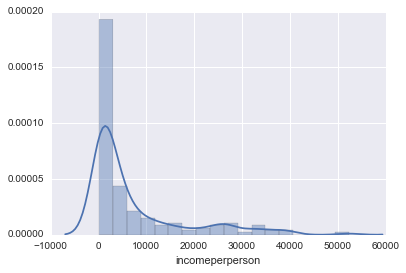

In [22]:
sb.distplot(data['incomeperperson'])

The first graph is of the counts of the incomeperperson variable with the values grouped into bins that allow for easy interpretation, if each value was plotted it would be a nearly staright line with some value counts of two.

From the printed code output of text and graph I can see that the spread is given as $10556 which indicates quite a large spread of values across the distribution. The shape is unimodal and right-skewed which means most of the values are bunched at the low-end of values, less than 10000, and only has one significant peak around the 0-2500 group of values. The centre can be measured by the mean =  7354, median =  2482, mode consists of a few distinct values and as the values are quantitative the mode is not descriptive.

C:\Users\georg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


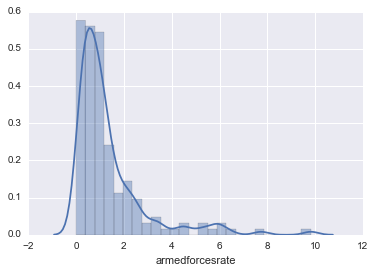

In [24]:
sb.distplot(data['armedforcesrate'])

The above graph is the counts of the armedforcesrate variable with the values grouped into bins that help represent the distribution more accurately, again the value counts of the values are all one so the counts would be a straight line if the values weren’t put into bins.

From the printed code output the spread is given as 1.528647% which indicates a cramped spread. The shape is unimodal and right-skewed as with incomeperperson, the significant peak centring around a value of 1%. The centre can be measured by the mean = 1.359446%, median = 0.9040245, mode is not applicable again.

C:\Users\georg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


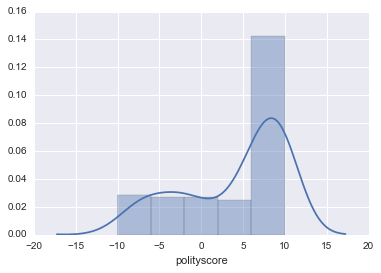

In [25]:
sb.distplot(data['polityscore'][data['polityscore'] < 11])

This graph shows the individual counts of the polityscore variable with the values not grouped into bins and it represents the distribution fully.

From the printed code output the spread is 6.197114 so covers a lot of the values. The shape is almost bimodal but is most similar to a unimodal distribution given the height of the counts of value 10, the distrobution doesn’t really fully exhibit left-skew so I would say that no skew is present in this distrobution. The significant peak is centred on a value of 9. The centre can be measured by the mean = 3.879195, median = 7, the mode is 10.

<i>Bivariate Plots</i>

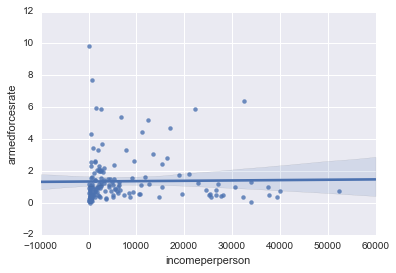

In [26]:
sb.regplot(x='incomeperperson', y='armedforcesrate', data=data)

Plotting incomeperperson against the armedforcesrate is the first visualisation for my main research question which is to test the association between the two.

My <i>Explanatory Independent Variable</i> is incomeperperson, and my <i>Response Dependent Variable</i> is armedforcesrate. 
   
The line of best fit is flat here, indicating that there is no significant association between the two, to make sure this isn’t a too-simplistic approach due to the spread of data I also have tried the quadratic fit but do not see any improvement in the fit to the data. I wasn’t expecting this, I was expecting a slightly positive correlation but there is none.

This shows a slightly higher elevation nearer the graph’s (0,0) coordinate but not a significant enough shape to warrant taking that fit over a linear one. The fit is weak at the start but stronger towards the right end of the line of best fit.

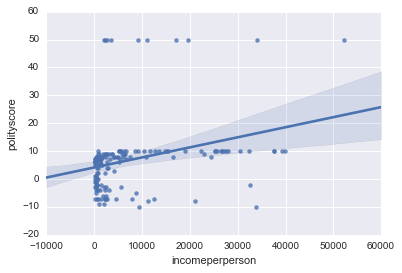

In [27]:
sb.regplot(x='incomeperperson', y='polityscore', data=data)

Next I took at look at the association between polityscore and armedforcesrate.

My <i>Explanatory Independent Variable</i> is polityscore, and my <i>Response Dependent Variable</i> is armedforcesrate. 

The linear line of best fit has a mostly negative gradient so as polityscore increases the armedforcesrate decreases. This again is counter to what I would be expecting. I tried a linear fit but found that the quadratic fit is a more representative, we can see the slope is beginning to become positive to the right of the line so the negative correlation starts to plateau. The relationship is weak.

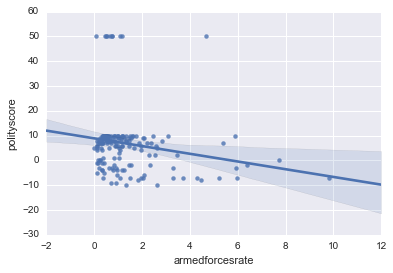

In [28]:
sb.regplot(x='armedforcesrate', y='polityscore', data=data)

Finally I took at look at the association between incomeperperson and polityscore.

My <i>Explanatory Independent Variable</i> is incomeperperson, and my <i>Response Dependent Variable</i> is polityscore. 

In the quadratic fit we can see that there are a few outlying values in the bottom-right of the graph, but the fit looks a lot better than the linear one, initially a positive correlation but changing into a negative one for higher incomes. The negative slope could be due to the outliers in which case it looks like the line of best fit would plateau. The relationship is weak at the lower end of scores.